# **Problem Statement**<a href="#Problem-Statement" class="anchor-link">¶</a>

A Company wants to automate the loan eligibility process (real time)
based on customer detail provided while filling online application form.
These details are Gender, Marital Status, Education, Number of
Dependents, Income, Loan Amount, Credit History and others.

Basically, we have to train our model on the given dataset so that it
can predict whether a loan can be approved or not to a customer given
his/her details

# **Hypothesis Generation**<a href="#Hypothesis-Generation" class="anchor-link">¶</a>

There are many factors which can impact loan approval:

1.  **Salary:** A person with higher salary has a greater chance of loan
    approval.
2.  **Loan Amount:** If loan amount is less, chance of loan approval is
    more.
3.  **Credit History:** People who have paid their earlier loans on time
    have higher chance of getting loan approved

# **Importing libraries**<a href="#Importing-libraries" class="anchor-link">¶</a>

In \[ \]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

# **Importing Dataset**<a href="#Importing-Dataset" class="anchor-link">¶</a>

The given data is in csv format. We will use pandas library to import it
in the form of dataframe

In \[ \]:

    df=pd.read_csv('/content/Training Set_Loan Prediction.csv')

# **Basic Understanding of the data**<a href="#Basic-Understanding-of-the-data" class="anchor-link">¶</a>

In \[ \]:

    df.head()  # top 5 rows in the dataset

Out\[ \]:

|     | Loan_ID  | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|----------|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 0   | LP001002 | Male   | No      | 0          | Graduate     | No            | 5849            | 0.0               | NaN        | 360.0            | 1.0            | Urban         | Y           |
| 1   | LP001003 | Male   | Yes     | 1          | Graduate     | No            | 4583            | 1508.0            | 128.0      | 360.0            | 1.0            | Rural         | N           |
| 2   | LP001005 | Male   | Yes     | 0          | Graduate     | Yes           | 3000            | 0.0               | 66.0       | 360.0            | 1.0            | Urban         | Y           |
| 3   | LP001006 | Male   | Yes     | 0          | Not Graduate | No            | 2583            | 2358.0            | 120.0      | 360.0            | 1.0            | Urban         | Y           |
| 4   | LP001008 | Male   | No      | 0          | Graduate     | No            | 6000            | 0.0               | 141.0      | 360.0            | 1.0            | Urban         | Y           |

In \[ \]:

    df.shape

Out\[ \]:

    (614, 13)

In \[ \]:

    df.columns

Out\[ \]:

    Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
           'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
           'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
          dtype='object')

Here, Loan_Status is the target variable

In \[ \]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 614 entries, 0 to 613
    Data columns (total 13 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Loan_ID            614 non-null    object 
     1   Gender             601 non-null    object 
     2   Married            611 non-null    object 
     3   Dependents         599 non-null    object 
     4   Education          614 non-null    object 
     5   Self_Employed      582 non-null    object 
     6   ApplicantIncome    614 non-null    int64  
     7   CoapplicantIncome  614 non-null    float64
     8   LoanAmount         592 non-null    float64
     9   Loan_Amount_Term   600 non-null    float64
     10  Credit_History     564 non-null    float64
     11  Property_Area      614 non-null    object 
     12  Loan_Status        614 non-null    object 
    dtypes: float64(4), int64(1), object(8)
    memory usage: 62.5+ KB

Here, some of the values are missing, which we will tackle later

In \[ \]:

    print("Number of missing/null values: ")
    for i in df.columns:
      print(f"{i} : {sum(df[i].isnull())}")

    Number of missing/null values: 
    Loan_ID : 0
    Gender : 13
    Married : 3
    Dependents : 15
    Education : 0
    Self_Employed : 32
    ApplicantIncome : 0
    CoapplicantIncome : 0
    LoanAmount : 22
    Loan_Amount_Term : 14
    Credit_History : 50
    Property_Area : 0
    Loan_Status : 0

Credit_History has most number of missing/NULL values

In \[ \]:

    df.describe()

Out\[ \]:

|       | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History |
|-------|-----------------|-------------------|------------|------------------|----------------|
| count | 614.000000      | 614.000000        | 592.000000 | 600.00000        | 564.000000     |
| mean  | 5403.459283     | 1621.245798       | 146.412162 | 342.00000        | 0.842199       |
| std   | 6109.041673     | 2926.248369       | 85.587325  | 65.12041         | 0.364878       |
| min   | 150.000000      | 0.000000          | 9.000000   | 12.00000         | 0.000000       |
| 25%   | 2877.500000     | 0.000000          | 100.000000 | 360.00000        | 1.000000       |
| 50%   | 3812.500000     | 1188.500000       | 128.000000 | 360.00000        | 1.000000       |
| 75%   | 5795.000000     | 2297.250000       | 168.000000 | 360.00000        | 1.000000       |
| max   | 81000.000000    | 41667.000000      | 700.000000 | 480.00000        | 1.000000       |

# **Exploratory Data Analysis**<a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>

**Univariate Analysis**

In \[1\]:

    df['Loan_Status'].unique()

    ---------------------------------------------------------------------------
    NameError                                 Traceback (most recent call last)
    <ipython-input-1-f0648f1ddf37> in <module>
    ----> 1 df['Loan_Status'].unique()

    NameError: name 'df' is not defined

There are 2 unique values of Loan_Staus- Y , N. That is, either loan is
approved or not. So, we have to do binary classification.

In \[ \]:

    sns.countplot(x='Loan_Status',data=df)

In \[ \]:

    df['Loan_Status'].value_counts()

422 people have been approved loan while 192 have not been approved loan

In \[ \]:

    df['Loan_Status'].value_counts().apply(lambda x : x*100/len(df))

In \[ \]:

    df['Loan_Status'].value_counts().apply(lambda x : x*100/len(df)).plot(kind='bar')

The above plot shows that 68.73% people have been approved loan and
31.27% people have not been approved loan

Although, the number of people who have not been approved loan is less,
but it is a significant figure showing that the dataset is **not
imbalanced**.

In \[ \]:

    df.info()

In \[ \]:

    cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']

In \[ \]:

    plt.figure(figsize=(16,10))
    k=331
    for i in cat_cols:
      plt.subplot(k)
      df[i].value_counts().plot(kind='bar',title=i)
      k+=1
    plt.tight_layout()

Followings points can be noted from the above visualization:

1.  Males are high in numbers for applying for loans than females.
2.  Married people are high in numbers for applying for loans than
    unmarried.
3.  People who have 0 dependents are high in numbers for applying for
    loans.
4.  Graduate people are high in numbers for applying for loans than
    not-graduate.
5.  People who are not self-employed are high in numbers for applying
    for loans.
6.  People who live in semi-urban areas are high in numbers for applying
    for loans.
7.  People who have past credit history are high in numbers for applying
    for loans.

In \[ \]:

    df.info()

In \[ \]:

    num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In \[ \]:

    plt.figure(figsize=(18,6))
    k=221
    for i in num_cols:
      plt.subplot(k)
      sns.distplot(df[i])
      plt.title(i)
      k+=1
    plt.tight_layout()

**Bivariate Analysis**

In \[ \]:

    df.info()

In \[ \]:

    gen_loan=df.pivot_table(index='Gender',columns='Loan_Status',values='CoapplicantIncome',aggfunc=len)
    gen_loan

In \[ \]:

    l=[]
    l.append(len(df[df['Gender']=='Female']))
    l.append(len(df[df['Gender']=='Male']))
    l=pd.Series(data=l,index=['Female','Male'])
    print(l)

In \[ \]:

    gen_loan.div(l/100,axis=0)  # percentage of male and female in terms of loan status

In \[ \]:

    gen_loan.div(l/100,axis=0).plot(kind='bar',stacked=True)
    plt.legend(loc='upper right')
    plt.ylabel('Percentage')

Above visualization depicts that gender is not going to play much role
in predicting loan approval.

In \[ \]:

    mar_loan=df.pivot_table(index='Married',columns='Loan_Status',values='CoapplicantIncome',aggfunc=len)
    mar_loan

In \[ \]:

    l=[]
    l.append(len(df[df['Married']=='No']))
    l.append(len(df[df['Married']=='Yes']))
    l=pd.Series(data=l,index=['No','Yes'])
    print(l)

In \[ \]:

    mar_loan.div(l/100,axis=0).plot(kind='bar',stacked=True)
    plt.legend(loc='upper right')
    plt.ylabel('Percentage')

Chances of people getting their loans approved is higher if they are
married

In \[ \]:

    dep_loan=df.pivot_table(index='Dependents',columns='Loan_Status',values='CoapplicantIncome',aggfunc=len)
    dep_loan

In \[ \]:

    l=[]
    l.append(len(df[df['Dependents']=='0']))
    l.append(len(df[df['Dependents']=='1']))
    l.append(len(df[df['Dependents']=='2']))
    l.append(len(df[df['Dependents']=='3+']))
    l=pd.Series(data=l,index=['0','1','2','3+'])
    print(l)

In \[ \]:

    dep_loan.div(l/100,axis=0).plot(kind='bar',stacked=True)
    plt.legend(loc='upper right')
    plt.ylabel('Percentage')

Chances of people getting their loans approved are higher if they have 2
dependents

In \[ \]:

    edu_loan=df.pivot_table(index='Education',columns='Loan_Status',values='CoapplicantIncome',aggfunc=len)
    edu_loan

In \[ \]:

    l=[]
    l.append(len(df[df['Education']=='Graduate']))
    l.append(len(df[df['Education']=='Not Graduate']))
    l=pd.Series(data=l,index=['Graduate','Not Graduate'])
    print(l)

In \[ \]:

    edu_loan.div(l/100,axis=0).plot(kind='bar',stacked=True)
    plt.legend(loc='upper right')
    plt.ylabel('Percentage')

Chances of people getting their loans approved are higher if they are
graduate

In \[ \]:

    sel_loan=df.pivot_table(index='Self_Employed',columns='Loan_Status',values='CoapplicantIncome',aggfunc=len)
    sel_loan

In \[ \]:

    l=[]
    l.append(len(df[df['Self_Employed']=='No']))
    l.append(len(df[df['Self_Employed']=='Yes']))
    l=pd.Series(data=l,index=['No','Yes'])
    print(l)

In \[ \]:

    sel_loan.div(l/100,axis=0).plot(kind='bar',stacked=True)
    plt.legend(loc='upper right')
    plt.ylabel('Percentage')

Above visualization depics that self_employed factor is not going to
play a major role in loan approval

In \[ \]:

    df.info()

In \[ \]:

    dmap={0:'0',1:'1'}
    df['Credit_History']=df['Credit_History'].map(dmap)

In \[ \]:

    df.info()

In \[ \]:

    cre_loan=df.pivot_table(index='Credit_History',columns='Loan_Status',values='CoapplicantIncome',aggfunc=len)
    cre_loan

In \[ \]:

    l=[]
    l.append(len(df[df['Credit_History']=='0']))
    l.append(len(df[df['Credit_History']=='1']))
    l=pd.Series(data=l,index=['0','1'])
    print(l)

In \[ \]:

    cre_loan.div(l/100,axis=0).plot(kind='bar',stacked=True)
    plt.legend(loc='upper right')
    plt.ylabel('Percentage')

Chances of people getting their loans approved are much higher if they
have past credit history

In \[ \]:

    pro_loan=df.pivot_table(index='Property_Area',columns='Loan_Status',values='CoapplicantIncome',aggfunc=len)
    pro_loan

In \[ \]:

    l=[]
    l.append(len(df[df['Property_Area']=='Rural']))
    l.append(len(df[df['Property_Area']=='Semiurban']))
    l.append(len(df[df['Property_Area']=='Urban']))
    l=pd.Series(data=l,index=['Rural','Semiurban','Urban'])
    print(l)

In \[ \]:

    pro_loan.div(l/100,axis=0).plot(kind='bar',stacked=True)
    plt.legend(loc='upper right')
    plt.ylabel('Percentage')

The people living in semi urban areas have higher chances of getting
their loans approved

In \[ \]:

    sns.pairplot(df)

1.  There seems a positive correlation b/w applicant income & loan
    amount.
2.  Most of the applicants applying for loans have income less than
    40,000 units.

In \[ \]:

    df.info()

In \[ \]:

    cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']

In \[ \]:

    num_cols=['LoanAmount','Loan_Amount_Term','ApplicantIncome']

In \[ \]:

    k=1
    plt.figure(figsize=(20,30))
    for i in cat_cols:
      for j in num_cols:
        plt.subplot(7,3,k)
        sns.barplot(x=i,y=j,data=df,estimator=np.mean)
        k+=1
    plt.tight_layout()

In \[ \]:

    g=sns.FacetGrid(data=df,col='Married',row='Gender')
    g.map(plt.scatter,'LoanAmount','ApplicantIncome')

No concrete information can be derived out from the above visualization

# **Missing Values Treatment**<a href="#Missing-Values-Treatment" class="anchor-link">¶</a>

In \[ \]:

    df.isnull().sum()

Out\[ \]:

    Loan_ID               0
    Gender               13
    Married               3
    Dependents           15
    Education             0
    Self_Employed        32
    ApplicantIncome       0
    CoapplicantIncome     0
    LoanAmount           22
    Loan_Amount_Term     14
    Credit_History       50
    Property_Area         0
    Loan_Status           0
    dtype: int64

In \[ \]:

    df.isnull()

Out\[ \]:

|     | Loan_ID | Gender | Married | Dependents | Education | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|---------|--------|---------|------------|-----------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 0   | False   | False  | False   | False      | False     | False         | False           | False             | True       | False            | False          | False         | False       |
| 1   | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |
| 2   | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |
| 3   | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |
| 4   | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |
| ... | ...     | ...    | ...     | ...        | ...       | ...           | ...             | ...               | ...        | ...              | ...            | ...           | ...         |
| 609 | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |
| 610 | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |
| 611 | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |
| 612 | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |
| 613 | False   | False  | False   | False      | False     | False         | False           | False             | False      | False            | False          | False         | False       |

614 rows × 13 columns

In \[ \]:

    df.iloc[0].isnull()

Out\[ \]:

    Loan_ID              False
    Gender               False
    Married              False
    Dependents           False
    Education            False
    Self_Employed        False
    ApplicantIncome      False
    CoapplicantIncome    False
    LoanAmount            True
    Loan_Amount_Term     False
    Credit_History       False
    Property_Area        False
    Loan_Status          False
    Name: 0, dtype: bool

In \[ \]:

    df.iloc[0].isnull().sum()

Out\[ \]:

    1

In \[ \]:

    df.shape

Out\[ \]:

    (614, 13)

In \[ \]:

    c=0
    l=[]

    for i in range(0,614):
      if (df.iloc[i].isnull().sum())>=3 :
        l.append(i)
        c+=1

In \[ \]:

    print(c)  # number of rows consisting 3 or more than 3 NaN/missing values

    2

In \[ \]:

    print(l)  # index of rows consisting of 3 or more than 3 NaN/missing values

    [95, 435]

In \[ \]:

    df.drop([95,435],axis=0,inplace=True)  # dropping rows consisting of >=3 missing values

In \[ \]:

    df.shape

Out\[ \]:

    (612, 13)

Now the dataframe has only 612 rows

In \[ \]:

    df.isnull().sum()

Out\[ \]:

    Loan_ID               0
    Gender               13
    Married               2
    Dependents           14
    Education             0
    Self_Employed        31
    ApplicantIncome       0
    CoapplicantIncome     0
    LoanAmount           20
    Loan_Amount_Term     14
    Credit_History       49
    Property_Area         0
    Loan_Status           0
    dtype: int64

In \[ \]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 612 entries, 0 to 613
    Data columns (total 13 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Loan_ID            612 non-null    object 
     1   Gender             599 non-null    object 
     2   Married            610 non-null    object 
     3   Dependents         598 non-null    object 
     4   Education          612 non-null    object 
     5   Self_Employed      581 non-null    object 
     6   ApplicantIncome    612 non-null    int64  
     7   CoapplicantIncome  612 non-null    float64
     8   LoanAmount         592 non-null    float64
     9   Loan_Amount_Term   598 non-null    float64
     10  Credit_History     563 non-null    object 
     11  Property_Area      612 non-null    object 
     12  Loan_Status        612 non-null    object 
    dtypes: float64(3), int64(1), object(9)
    memory usage: 66.9+ KB

In \[ \]:

    df[df['Gender'].isnull()==True]

Out\[ \]:

|     | Loan_ID  | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|----------|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 23  | LP001050 | NaN    | Yes     | 2          | Not Graduate | No            | 3365            | 1917.0            | 112.0      | 360.0            | 0              | Rural         | N           |
| 126 | LP001448 | NaN    | Yes     | 3+         | Graduate     | No            | 23803           | 0.0               | 370.0      | 360.0            | 1              | Rural         | Y           |
| 171 | LP001585 | NaN    | Yes     | 3+         | Graduate     | No            | 51763           | 0.0               | 700.0      | 300.0            | 1              | Urban         | Y           |
| 188 | LP001644 | NaN    | Yes     | 0          | Graduate     | Yes           | 674             | 5296.0            | 168.0      | 360.0            | 1              | Rural         | Y           |
| 314 | LP002024 | NaN    | Yes     | 0          | Graduate     | No            | 2473            | 1843.0            | 159.0      | 360.0            | 1              | Rural         | N           |
| 334 | LP002103 | NaN    | Yes     | 1          | Graduate     | Yes           | 9833            | 1833.0            | 182.0      | 180.0            | 1              | Urban         | Y           |
| 460 | LP002478 | NaN    | Yes     | 0          | Graduate     | Yes           | 2083            | 4083.0            | 160.0      | 360.0            | NaN            | Semiurban     | Y           |
| 467 | LP002501 | NaN    | Yes     | 0          | Graduate     | No            | 16692           | 0.0               | 110.0      | 360.0            | 1              | Semiurban     | Y           |
| 477 | LP002530 | NaN    | Yes     | 2          | Graduate     | No            | 2873            | 1872.0            | 132.0      | 360.0            | 0              | Semiurban     | N           |
| 507 | LP002625 | NaN    | No      | 0          | Graduate     | No            | 3583            | 0.0               | 96.0       | 360.0            | 1              | Urban         | N           |
| 576 | LP002872 | NaN    | Yes     | 0          | Graduate     | No            | 3087            | 2210.0            | 136.0      | 360.0            | 0              | Semiurban     | N           |
| 588 | LP002925 | NaN    | No      | 0          | Graduate     | No            | 4750            | 0.0               | 94.0       | 360.0            | 1              | Semiurban     | Y           |
| 592 | LP002933 | NaN    | No      | 3+         | Graduate     | Yes           | 9357            | 0.0               | 292.0      | 360.0            | 1              | Semiurban     | Y           |

Imputing missing values for categorical variables with mode and for
continuous variables with median

In \[ \]:

    df['Gender'].mode()[0]

Out\[ \]:

    'Male'

In \[ \]:

    df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In \[ \]:

    df.isnull().sum()

Out\[ \]:

    Loan_ID               0
    Gender                0
    Married               2
    Dependents           14
    Education             0
    Self_Employed        31
    ApplicantIncome       0
    CoapplicantIncome     0
    LoanAmount           20
    Loan_Amount_Term     14
    Credit_History       49
    Property_Area         0
    Loan_Status           0
    dtype: int64

In \[ \]:

    df['Married'].fillna(df['Married'].mode()[0],inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In \[ \]:

    df.isnull().sum()

Out\[ \]:

    Loan_ID               0
    Gender                0
    Married               0
    Dependents            0
    Education             0
    Self_Employed         0
    ApplicantIncome       0
    CoapplicantIncome     0
    LoanAmount           20
    Loan_Amount_Term      0
    Credit_History        0
    Property_Area         0
    Loan_Status           0
    dtype: int64

In \[ \]:

    df[df['LoanAmount'].isnull()==True]

Out\[ \]:

|     | Loan_ID  | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|----------|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 0   | LP001002 | Male   | No      | 0          | Graduate     | No            | 5849            | 0.0               | NaN        | 360.0            | 1              | Urban         | Y           |
| 35  | LP001106 | Male   | Yes     | 0          | Graduate     | No            | 2275            | 2067.0            | NaN        | 360.0            | 1              | Urban         | Y           |
| 63  | LP001213 | Male   | Yes     | 1          | Graduate     | No            | 4945            | 0.0               | NaN        | 360.0            | 0              | Rural         | N           |
| 81  | LP001266 | Male   | Yes     | 1          | Graduate     | Yes           | 2395            | 0.0               | NaN        | 360.0            | 1              | Semiurban     | Y           |
| 102 | LP001350 | Male   | Yes     | 0          | Graduate     | No            | 13650           | 0.0               | NaN        | 360.0            | 1              | Urban         | Y           |
| 103 | LP001356 | Male   | Yes     | 0          | Graduate     | No            | 4652            | 3583.0            | NaN        | 360.0            | 1              | Semiurban     | Y           |
| 113 | LP001392 | Female | No      | 1          | Graduate     | Yes           | 7451            | 0.0               | NaN        | 360.0            | 1              | Semiurban     | Y           |
| 127 | LP001449 | Male   | No      | 0          | Graduate     | No            | 3865            | 1640.0            | NaN        | 360.0            | 1              | Rural         | Y           |
| 202 | LP001682 | Male   | Yes     | 3+         | Not Graduate | No            | 3992            | 0.0               | NaN        | 180.0            | 1              | Urban         | N           |
| 284 | LP001922 | Male   | Yes     | 0          | Graduate     | No            | 20667           | 0.0               | NaN        | 360.0            | 1              | Rural         | N           |
| 305 | LP001990 | Male   | No      | 0          | Not Graduate | No            | 2000            | 0.0               | NaN        | 360.0            | 1              | Urban         | N           |
| 322 | LP002054 | Male   | Yes     | 2          | Not Graduate | No            | 3601            | 1590.0            | NaN        | 360.0            | 1              | Rural         | Y           |
| 338 | LP002113 | Female | No      | 3+         | Not Graduate | No            | 1830            | 0.0               | NaN        | 360.0            | 0              | Urban         | N           |
| 387 | LP002243 | Male   | Yes     | 0          | Not Graduate | No            | 3010            | 3136.0            | NaN        | 360.0            | 0              | Urban         | N           |
| 437 | LP002401 | Male   | Yes     | 0          | Graduate     | No            | 2213            | 1125.0            | NaN        | 360.0            | 1              | Urban         | Y           |
| 479 | LP002533 | Male   | Yes     | 2          | Graduate     | No            | 2947            | 1603.0            | NaN        | 360.0            | 1              | Urban         | N           |
| 524 | LP002697 | Male   | No      | 0          | Graduate     | No            | 4680            | 2087.0            | NaN        | 360.0            | 1              | Semiurban     | N           |
| 550 | LP002778 | Male   | Yes     | 2          | Graduate     | Yes           | 6633            | 0.0               | NaN        | 360.0            | 0              | Rural         | N           |
| 551 | LP002784 | Male   | Yes     | 1          | Not Graduate | No            | 2492            | 2375.0            | NaN        | 360.0            | 1              | Rural         | Y           |
| 605 | LP002960 | Male   | Yes     | 0          | Not Graduate | No            | 2400            | 3800.0            | NaN        | 180.0            | 1              | Urban         | N           |

In \[ \]:

    df['LoanAmount'].median()

Out\[ \]:

    128.0

In \[ \]:

    df['LoanAmount'].mean()

Out\[ \]:

    146.41216216216216

In \[ \]:

    df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In \[ \]:

    df.isnull().sum()

Out\[ \]:

    Loan_ID              0
    Gender               0
    Married              0
    Dependents           0
    Education            0
    Self_Employed        0
    ApplicantIncome      0
    CoapplicantIncome    0
    LoanAmount           0
    Loan_Amount_Term     0
    Credit_History       0
    Property_Area        0
    Loan_Status          0
    dtype: int64

In \[ \]:

    data1=df.copy()

# **Feature Engineering**<a href="#Feature-Engineering" class="anchor-link">¶</a>

In \[ \]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 612 entries, 0 to 613
    Data columns (total 13 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Loan_ID            612 non-null    object 
     1   Gender             612 non-null    object 
     2   Married            612 non-null    object 
     3   Dependents         612 non-null    object 
     4   Education          612 non-null    object 
     5   Self_Employed      612 non-null    object 
     6   ApplicantIncome    612 non-null    int64  
     7   CoapplicantIncome  612 non-null    float64
     8   LoanAmount         612 non-null    float64
     9   Loan_Amount_Term   612 non-null    float64
     10  Credit_History     612 non-null    object 
     11  Property_Area      612 non-null    object 
     12  Loan_Status        612 non-null    object 
    dtypes: float64(3), int64(1), object(9)
    memory usage: 66.9+ KB

In \[ \]:

    df['Loan_Status'].unique()

Out\[ \]:

    array(['Y', 'N'], dtype=object)

Let us convert our target variable, i.e. Loan_Status into numerical form
where 1 will represent 'Y' and 0 will represent 'N'

In \[ \]:

    df['Loan_Status'].replace('N',0,inplace=True)
    df['Loan_Status'].replace('Y',1,inplace=True)

In \[ \]:

    df['Loan_Status'].unique()

Out\[ \]:

    array([1, 0])

In \[ \]:

    df['Loan_Status'].dtype

Out\[ \]:

    dtype('int64')

Let us draw a heatmap of the correlation plot which will tell us about
feature importance

In \[ \]:

    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr(),cmap='coolwarm',linecolor='black',lw=1,annot=True)
    plt.title('Correlation Plot')

Out\[ \]:

    Text(0.5, 1.0, 'Correlation Plot')

<img
src="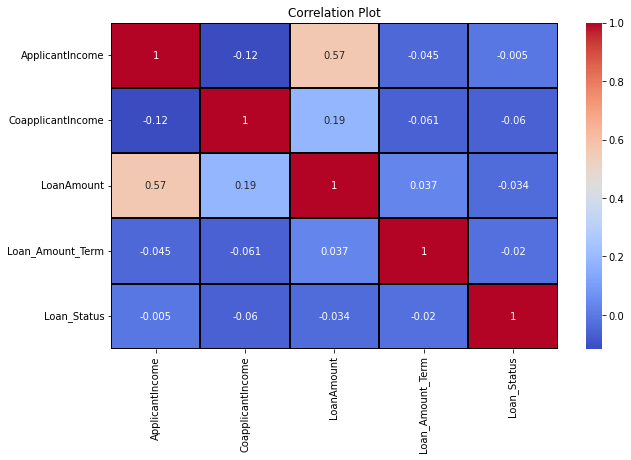%0A"
class="jp-needs-light-background" />

ApplicantIncome does not have a high correlation with LoanStatus. Let us
make a new variable TotalIncome which is the sumtotal of ApplicantIncome
& CoapplicantIncome.

In \[ \]:

    df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In \[ \]:

    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr(),cmap='coolwarm',linecolor='black',lw=1,annot=True)
    plt.title('Correlation Plot')

Out\[ \]:

    Text(0.5, 1.0, 'Correlation Plot')

<img
src="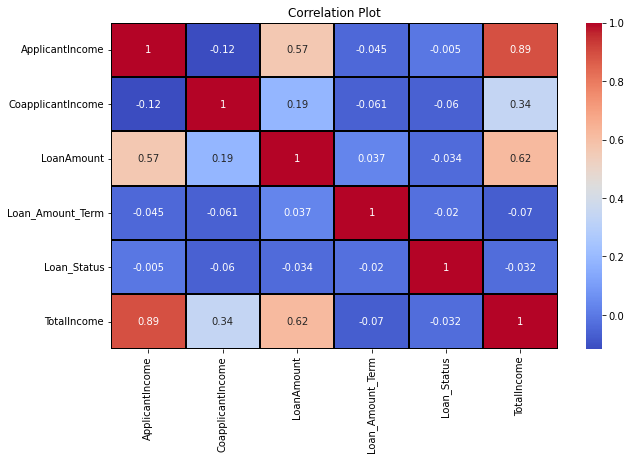%0A"
class="jp-needs-light-background" />

In \[ \]:

    df['Credit_History'].unique()

Out\[ \]:

    array(['1', '0'], dtype=object)

In \[ \]:

    df['Loan_Amount_Term'].unique()

Out\[ \]:

    array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

Loan_Amount_term is in months. Let us convert it into years by dividing
by 12.

In \[ \]:

    df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

In \[ \]:

    df['Loan_Amount_Term'].unique()

Out\[ \]:

    array([30., 10., 20., 15.,  5., 25., 40.,  3.,  7.,  1.])

In \[ \]:

    df['Loan_Amount_Term'].dtype

Out\[ \]:

    dtype('float64')

In \[ \]:

    df['Dependents'].unique()

Out\[ \]:

    array(['0', '1', '2', '3+'], dtype=object)

Let us consider '3+' as 3

In \[ \]:

    df['Dependents']=df['Dependents'].apply(lambda x : int(x) if x!='3+' else 3)

In \[ \]:

    df['Dependents'].unique()

Out\[ \]:

    array([0, 1, 2, 3])

In \[ \]:

    df['Dependents'].dtype

Out\[ \]:

    dtype('int64')

In \[ \]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 612 entries, 0 to 613
    Data columns (total 14 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Loan_ID            612 non-null    object 
     1   Gender             612 non-null    object 
     2   Married            612 non-null    object 
     3   Dependents         612 non-null    int64  
     4   Education          612 non-null    object 
     5   Self_Employed      612 non-null    object 
     6   ApplicantIncome    612 non-null    int64  
     7   CoapplicantIncome  612 non-null    float64
     8   LoanAmount         612 non-null    float64
     9   Loan_Amount_Term   612 non-null    float64
     10  Credit_History     612 non-null    object 
     11  Property_Area      612 non-null    object 
     12  Loan_Status        612 non-null    int64  
     13  TotalIncome        612 non-null    float64
    dtypes: float64(4), int64(3), object(7)
    memory usage: 71.7+ KB

Loan_ID is not going to impact our target variable. So we can drop it.
We can also drop ApplicantIncome & CoapplicantIncome variables and use
TotalIncome as a feature.

In \[ \]:

    cols=['Loan_ID','ApplicantIncome','CoapplicantIncome']
    data=df.drop(cols,axis=1)

In \[ \]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 612 entries, 0 to 613
    Data columns (total 11 columns):
     #   Column            Non-Null Count  Dtype  
    ---  ------            --------------  -----  
     0   Gender            612 non-null    object 
     1   Married           612 non-null    object 
     2   Dependents        612 non-null    int64  
     3   Education         612 non-null    object 
     4   Self_Employed     612 non-null    object 
     5   LoanAmount        612 non-null    float64
     6   Loan_Amount_Term  612 non-null    float64
     7   Credit_History    612 non-null    object 
     8   Property_Area     612 non-null    object 
     9   Loan_Status       612 non-null    int64  
     10  TotalIncome       612 non-null    float64
    dtypes: float64(3), int64(2), object(6)
    memory usage: 57.4+ KB

# **Outliers Treatment**<a href="#Outliers-Treatment" class="anchor-link">¶</a>

In \[ \]:

    data['LoanAmount'].hist(bins=20)

Out\[ \]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7feaa6d74890>

<img
src="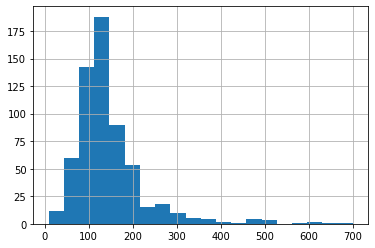%0A"
class="jp-needs-light-background" />

There seem to be some outliers in LoanAmount & the plot seems to be
right skewed

Let us apply log transformation to deal with it.

In \[ \]:

    data['log_LoanAmount']=np.log(data['LoanAmount'])

In \[ \]:

    data['log_LoanAmount'].hist(bins=20)

Out\[ \]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7feaa6cbc0d0>

<img
src="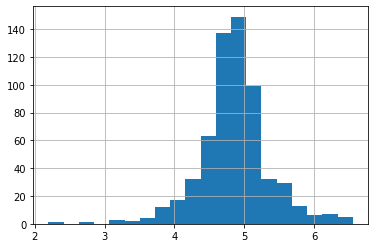%0A"
class="jp-needs-light-background" />

In \[ \]:

    data['TotalIncome'].hist(bins=20)

Out\[ \]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7feaa6c29490>

<img
src="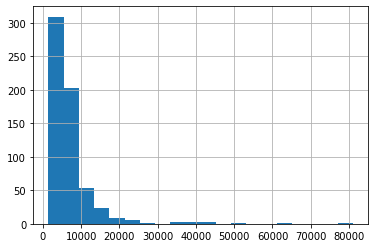%0A"
class="jp-needs-light-background" />

In \[ \]:

    data['log_TotalIncome']=np.log(data['TotalIncome'])

In \[ \]:

    data['log_TotalIncome'].hist(bins=20)

Out\[ \]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7feaa6b85150>

<img
src="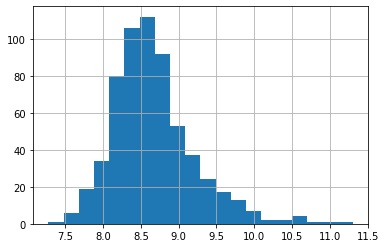%0A"
class="jp-needs-light-background" />

In \[ \]:

    data.drop(['TotalIncome','LoanAmount'],axis=1,inplace=True)

In \[ \]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 612 entries, 0 to 613
    Data columns (total 11 columns):
     #   Column            Non-Null Count  Dtype  
    ---  ------            --------------  -----  
     0   Gender            612 non-null    object 
     1   Married           612 non-null    object 
     2   Dependents        612 non-null    int64  
     3   Education         612 non-null    object 
     4   Self_Employed     612 non-null    object 
     5   Loan_Amount_Term  612 non-null    float64
     6   Credit_History    612 non-null    object 
     7   Property_Area     612 non-null    object 
     8   Loan_Status       612 non-null    int64  
     9   log_LoanAmount    612 non-null    float64
     10  log_TotalIncome   612 non-null    float64
    dtypes: float64(3), int64(2), object(6)
    memory usage: 57.4+ KB

# **Encoding Categorical Data**<a href="#Encoding-Categorical-Data" class="anchor-link">¶</a>

It is done to convert strings or categories into numerical values

In \[ \]:

    data['Dependents'].unique()

Out\[ \]:

    array([0, 1, 2, 3])

In \[ \]:

    data['Loan_Amount_Term'].unique()

Out\[ \]:

    array([30., 10., 20., 15.,  5., 25., 40.,  3.,  7.,  1.])

Ordinal Encoding has been already applied on Dependents & similar is the
case with Loan_Amount_Term

In \[ \]:

    data['Credit_History'].unique()

Out\[ \]:

    array(['1', '0'], dtype=object)

In \[ \]:

    data['Gender'].unique()

Out\[ \]:

    array(['Male', 'Female'], dtype=object)

In \[ \]:

    data['Gender']=data['Gender'].apply(lambda x : 1 if x=='Male' else 0)

In \[ \]:

    data['Gender'].unique()

Out\[ \]:

    array([1, 0])

In \[ \]:

    data['Married'].unique()

Out\[ \]:

    array(['No', 'Yes'], dtype=object)

In \[ \]:

    data['Married']=data['Married'].apply(lambda x : 1 if x=='Yes' else 0)

In \[ \]:

    data['Married'].unique()

Out\[ \]:

    array([0, 1])

In \[ \]:

    data['Education'].unique()

Out\[ \]:

    array(['Graduate', 'Not Graduate'], dtype=object)

In \[ \]:

    data['Education']=data['Education'].apply(lambda x : 2 if x=='Graduate' else 1)

In \[ \]:

    data['Education'].unique()

Out\[ \]:

    array([2, 1])

In \[ \]:

    data['Self_Employed'].unique()

Out\[ \]:

    array(['No', 'Yes'], dtype=object)

In \[ \]:

    data['Self_Employed']=data['Self_Employed'].apply(lambda x : 1 if x=='Yes' else 0)

In \[ \]:

    data['Self_Employed'].unique()

Out\[ \]:

    array([0, 1])

In \[ \]:

    data['Property_Area'].unique()

Out\[ \]:

    array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In \[ \]:

    data=pd.get_dummies(data,columns=['Property_Area'],drop_first=True)

In \[ \]:

    data.head()

Out\[ \]:

|     | Gender | Married | Dependents | Education | Self_Employed | Loan_Amount_Term | Credit_History | Loan_Status | log_LoanAmount | log_TotalIncome | Property_Area_Semiurban | Property_Area_Urban |
|-----|--------|---------|------------|-----------|---------------|------------------|----------------|-------------|----------------|-----------------|-------------------------|---------------------|
| 0   | 1      | 0       | 0          | 2         | 0             | 30.0             | 1              | 1           | 4.852030       | 8.674026        | 0                       | 1                   |
| 1   | 1      | 1       | 1          | 2         | 0             | 30.0             | 1              | 0           | 4.852030       | 8.714568        | 0                       | 0                   |
| 2   | 1      | 1       | 0          | 2         | 1             | 30.0             | 1              | 1           | 4.189655       | 8.006368        | 0                       | 1                   |
| 3   | 1      | 1       | 0          | 1         | 0             | 30.0             | 1              | 1           | 4.787492       | 8.505323        | 0                       | 1                   |
| 4   | 1      | 0       | 0          | 2         | 0             | 30.0             | 1              | 1           | 4.948760       | 8.699515        | 0                       | 1                   |

# **Preparing Test Data**<a href="#Preparing-Test-Data" class="anchor-link">¶</a>

In \[ \]:

    test=pd.read_csv('/content/Test Set_Loan Prediction.csv')

In \[ \]:

    test.head()

Out\[ \]:

|     | Loan_ID  | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area |
|-----|----------|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|
| 0   | LP001015 | Male   | Yes     | 0          | Graduate     | No            | 5720            | 0                 | 110.0      | 360.0            | 1.0            | Urban         |
| 1   | LP001022 | Male   | Yes     | 1          | Graduate     | No            | 3076            | 1500              | 126.0      | 360.0            | 1.0            | Urban         |
| 2   | LP001031 | Male   | Yes     | 2          | Graduate     | No            | 5000            | 1800              | 208.0      | 360.0            | 1.0            | Urban         |
| 3   | LP001035 | Male   | Yes     | 2          | Graduate     | No            | 2340            | 2546              | 100.0      | 360.0            | NaN            | Urban         |
| 4   | LP001051 | Male   | No      | 0          | Not Graduate | No            | 3276            | 0                 | 78.0       | 360.0            | 1.0            | Urban         |

In \[ \]:

    test1=test.copy()

In \[ \]:

    test.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 367 entries, 0 to 366
    Data columns (total 12 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Loan_ID            367 non-null    object 
     1   Gender             356 non-null    object 
     2   Married            367 non-null    object 
     3   Dependents         357 non-null    object 
     4   Education          367 non-null    object 
     5   Self_Employed      344 non-null    object 
     6   ApplicantIncome    367 non-null    int64  
     7   CoapplicantIncome  367 non-null    int64  
     8   LoanAmount         362 non-null    float64
     9   Loan_Amount_Term   361 non-null    float64
     10  Credit_History     338 non-null    float64
     11  Property_Area      367 non-null    object 
    dtypes: float64(3), int64(2), object(7)
    memory usage: 34.5+ KB

In \[ \]:

    test.isnull().sum()

Out\[ \]:

    Loan_ID               0
    Gender               11
    Married               0
    Dependents           10
    Education             0
    Self_Employed        23
    ApplicantIncome       0
    CoapplicantIncome     0
    LoanAmount            5
    Loan_Amount_Term      6
    Credit_History       29
    Property_Area         0
    dtype: int64

In \[ \]:

    test['Gender'].fillna(data1['Gender'].mode()[0],inplace=True)
    test['Dependents'].fillna(data1['Dependents'].mode()[0],inplace=True)
    test['Self_Employed'].fillna(data1['Self_Employed'].mode()[0],inplace=True)
    test['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].mode()[0],inplace=True)
    test['Credit_History'].fillna(data1['Credit_History'].mode()[0],inplace=True)

    test['LoanAmount'].fillna(data1['LoanAmount'].median(),inplace=True)

In \[ \]:

    test.isnull().sum()

Out\[ \]:

    Loan_ID              0
    Gender               0
    Married              0
    Dependents           0
    Education            0
    Self_Employed        0
    ApplicantIncome      0
    CoapplicantIncome    0
    LoanAmount           0
    Loan_Amount_Term     0
    Credit_History       0
    Property_Area        0
    dtype: int64

In \[ \]:

    test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']

In \[ \]:

    test['Loan_Amount_Term']=test['Loan_Amount_Term']/12

In \[ \]:

    test['Dependents'].unique()

Out\[ \]:

    array(['0', '1', '2', '3+'], dtype=object)

In \[ \]:

    test['Dependents']=test['Dependents'].apply(lambda x : int(x) if x!='3+' else 3)

In \[ \]:

    cols=['Loan_ID','ApplicantIncome','CoapplicantIncome']
    test=test.drop(cols,axis=1)

In \[ \]:

    test['log_LoanAmount']=np.log(test['LoanAmount'])
    test['log_TotalIncome']=np.log(test['TotalIncome'])

    test.drop(['TotalIncome','LoanAmount'],axis=1,inplace=True)

In \[ \]:

    test['Gender']=test['Gender'].apply(lambda x : 1 if x=='Male' else 0)
    test['Married']=test['Married'].apply(lambda x : 1 if x=='Yes' else 0)
    test['Education']=test['Education'].apply(lambda x : 2 if x=='Graduate' else 1)
    test['Self_Employed']=test['Self_Employed'].apply(lambda x : 1 if x=='Yes' else 0)
    test=pd.get_dummies(test,columns=['Property_Area'],drop_first=True)

In \[ \]:

    test.head()

Out\[ \]:

|     | Gender | Married | Dependents | Education | Self_Employed | Loan_Amount_Term | Credit_History | log_LoanAmount | log_TotalIncome | Property_Area_Semiurban | Property_Area_Urban |
|-----|--------|---------|------------|-----------|---------------|------------------|----------------|----------------|-----------------|-------------------------|---------------------|
| 0   | 1      | 1       | 0          | 2         | 0             | 30.0             | 1              | 4.700480       | 8.651724        | 0                       | 1                   |
| 1   | 1      | 1       | 1          | 2         | 0             | 30.0             | 1              | 4.836282       | 8.428581        | 0                       | 1                   |
| 2   | 1      | 1       | 2          | 2         | 0             | 30.0             | 1              | 5.337538       | 8.824678        | 0                       | 1                   |
| 3   | 1      | 1       | 2          | 2         | 0             | 30.0             | 1              | 4.605170       | 8.494129        | 0                       | 1                   |
| 4   | 1      | 0       | 0          | 1         | 0             | 30.0             | 1              | 4.356709       | 8.094378        | 0                       | 1                   |

# **Separating dependent and independent features**<a href="#Separating-dependent-and-independent-features"
class="anchor-link">¶</a>

In \[ \]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 612 entries, 0 to 613
    Data columns (total 12 columns):
     #   Column                   Non-Null Count  Dtype  
    ---  ------                   --------------  -----  
     0   Gender                   612 non-null    int64  
     1   Married                  612 non-null    int64  
     2   Dependents               612 non-null    int64  
     3   Education                612 non-null    int64  
     4   Self_Employed            612 non-null    int64  
     5   Loan_Amount_Term         612 non-null    float64
     6   Credit_History           612 non-null    object 
     7   Loan_Status              612 non-null    int64  
     8   log_LoanAmount           612 non-null    float64
     9   log_TotalIncome          612 non-null    float64
     10  Property_Area_Semiurban  612 non-null    uint8  
     11  Property_Area_Urban      612 non-null    uint8  
    dtypes: float64(3), int64(6), object(1), uint8(2)
    memory usage: 53.8+ KB

In \[ \]:

    X=data.drop('Loan_Status', axis=1)
    X.head()

Out\[ \]:

|     | Gender | Married | Dependents | Education | Self_Employed | Loan_Amount_Term | Credit_History | log_LoanAmount | log_TotalIncome | Property_Area_Semiurban | Property_Area_Urban |
|-----|--------|---------|------------|-----------|---------------|------------------|----------------|----------------|-----------------|-------------------------|---------------------|
| 0   | 1      | 0       | 0          | 2         | 0             | 30.0             | 1              | 4.852030       | 8.674026        | 0                       | 1                   |
| 1   | 1      | 1       | 1          | 2         | 0             | 30.0             | 1              | 4.852030       | 8.714568        | 0                       | 0                   |
| 2   | 1      | 1       | 0          | 2         | 1             | 30.0             | 1              | 4.189655       | 8.006368        | 0                       | 1                   |
| 3   | 1      | 1       | 0          | 1         | 0             | 30.0             | 1              | 4.787492       | 8.505323        | 0                       | 1                   |
| 4   | 1      | 0       | 0          | 2         | 0             | 30.0             | 1              | 4.948760       | 8.699515        | 0                       | 1                   |

In \[ \]:

    y=data['Loan_Status']
    y.head()

Out\[ \]:

    0    1
    1    0
    2    1
    3    1
    4    1
    Name: Loan_Status, dtype: int64

# **Logistic Regression**<a href="#Logistic-Regression" class="anchor-link">¶</a>

In \[ \]:

    from sklearn.metrics import accuracy_score, precision_score, recall_score
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score, roc_curve, auc
    from sklearn.linear_model import LogisticRegression

In \[ \]:

    skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=888)
    pred_test_full=0
    cv_acc=[]
    cv_roc=[]
    cv_pre=[]
    cv_rec=[]
    i=1
    k=231
    plt.figure(figsize=(16,10))
    for train_index,test_index in skf.split(X,y):
      xtr,xvl=X.iloc[train_index],X.iloc[test_index]
      ytr,yvl=y.iloc[train_index],y.iloc[test_index]

      lr=LogisticRegression(max_iter=200)
      lr.fit(xtr,ytr)
      acc=accuracy_score(yvl,lr.predict(xvl))
      roc=roc_auc_score(yvl,lr.predict(xvl))
      pre=precision_score(yvl,lr.predict(xvl))
      rec=recall_score(yvl,lr.predict(xvl))
      
      fpr,tpr,thr=roc_curve(yvl,lr.predict_proba(xvl)[:,1])
      plt.subplot(k)
      plt.plot(fpr,tpr,label=f"Accuracy={acc}\nAUC={roc}\nPrecision={pre}\nRecall={rec}")
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(f"{i} K Fold")
      plt.legend(loc=4)

      cv_acc.append(acc)
      cv_roc.append(roc)
      cv_pre.append(pre)
      cv_rec.append(rec)
      pred_test=lr.predict_proba(test)[:,1]
      pred_test_full+=pred_test
      i+=1
      k+=1

    plt.tight_layout()
    plt.show()

    print(f"\nMean of accuracy = {np.mean(cv_acc)}")
    print(f"Mean of auc score = {np.mean(cv_roc)}")
    print(f"Mean of precision = {np.mean(cv_pre)}")
    print(f"Mean of recall = {np.mean(cv_rec)}")

<img
src="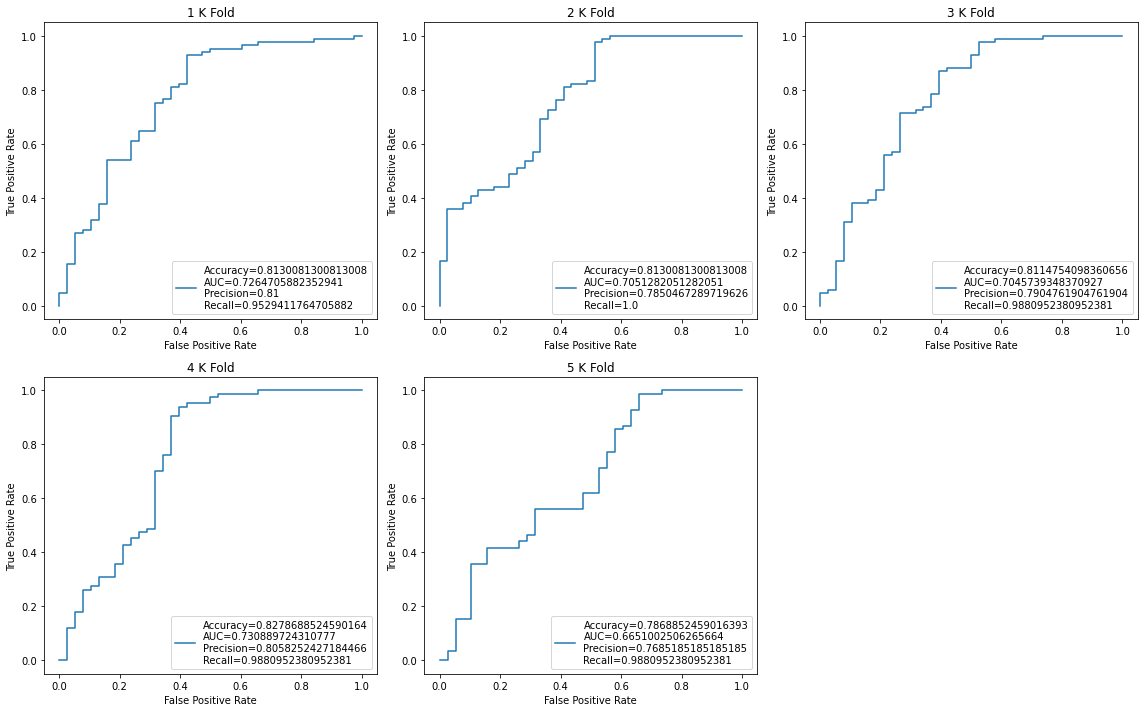%0A"
class="jp-needs-light-background" />

    Mean of accuracy = 0.8104491536718645
    Mean of auc score = 0.706432540627587
    Mean of precision = 0.7919733361370237
    Mean of recall = 0.9834453781512605

In \[ \]:

    y_pred=pred_test_full/5
    log_reg=pd.DataFrame({'Loan_ID':test1['Loan_ID'],'Loan_Status':y_pred})
    log_reg['Loan_Status']=log_reg['Loan_Status'].apply(lambda x : 'Y' if x>=0.5 else 'N')

    log_reg.to_csv('log_reg.csv',index=False)

# **Decision Tree**<a href="#Decision-Tree" class="anchor-link">¶</a>

In \[ \]:

    from sklearn.tree import DecisionTreeClassifier

In \[ \]:

    dt=DecisionTreeClassifier(random_state=42)

In \[ \]:

    from sklearn.model_selection import GridSearchCV

In \[ \]:

    # params={
    #     'max_depth':[3,4,5],
    #     'criterion':["gini","entropy"],
    #     'min_samples_leaf':[10,20,50],
    #     'min_samples_split':[30,40,50]
    # }

In \[ \]:

    # grid_search=GridSearchCV(
    #     estimator=dt,
    #     param_grid=params,
    #     cv=5,
    #     n_jobs=-1,
    #     scoring="accuracy"
    # )

In \[ \]:

    # grid_search.fit(X,y)

In \[ \]:

    # grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
criterion='gini', max_depth=3, max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=50,
min_samples_split=30, min_weight_fraction_leaf=0.0,
presort='deprecated', random_state=42, splitter='best')

In \[ \]:

    # grid_search.best_score_

0.810515793682527

In \[ \]:

    skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=888)
    pred_test_full=0
    cv_acc=[]
    cv_pre=[]
    cv_rec=[]
    i=1

    for train_index,test_index in skf.split(X,y):
      print(f"{i} K Fold")
      xtr,xvl=X.iloc[train_index],X.iloc[test_index]
      ytr,yvl=y.iloc[train_index],y.iloc[test_index]

      dt=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=30,
                           min_weight_fraction_leaf=0.0, presort='deprecated',
                           random_state=42, splitter='best')
      
      dt.fit(xtr,ytr)
      acc=accuracy_score(yvl,dt.predict(xvl))
      pre=precision_score(yvl,dt.predict(xvl))
      rec=recall_score(yvl,dt.predict(xvl))
      
      print(f"Accuracy={acc}")
      print(f"Precision={pre}")
      print(f"Recall={rec}\n")

      cv_acc.append(acc)
      cv_pre.append(pre)
      cv_rec.append(rec)

      pred_test=dt.predict(test)
      pred_test_full+=pred_test
      i+=1

    print(f"\nMean of accuracy = {np.mean(cv_acc)}")
    print(f"Mean of precision = {np.mean(cv_pre)}")
    print(f"Mean of recall = {np.mean(cv_rec)}")

    1 K Fold
    Accuracy=0.8130081300813008
    Precision=0.81
    Recall=0.9529411764705882

    2 K Fold
    Accuracy=0.8130081300813008
    Precision=0.7850467289719626
    Recall=1.0

    3 K Fold
    Accuracy=0.8114754098360656
    Precision=0.7904761904761904
    Recall=0.9880952380952381

    4 K Fold
    Accuracy=0.8278688524590164
    Precision=0.8058252427184466
    Recall=0.9880952380952381

    5 K Fold
    Accuracy=0.7868852459016393
    Precision=0.7685185185185185
    Recall=0.9880952380952381


    Mean of accuracy = 0.8104491536718645
    Mean of precision = 0.7919733361370237
    Mean of recall = 0.9834453781512605

In \[ \]:

    y_pred=pred_test_full
    dec_tre=pd.DataFrame({'Loan_ID':test1['Loan_ID'],'Loan_Status':y_pred})
    dec_tre['Loan_Status']=dec_tre['Loan_Status'].apply(lambda x : 'Y' if x>=3 else 'N')

    dec_tre.to_csv('dec_tre.csv',index=False)

# **Random Forest**<a href="#Random-Forest" class="anchor-link">¶</a>

In \[ \]:

    from sklearn.ensemble import RandomForestClassifier

In \[ \]:

    rf=RandomForestClassifier(random_state=42)

In \[ \]:

    # params={
    #     'max_depth':[2,3,4],
    #     'min_samples_leaf':[5,15,20,30],
    #     'min_samples_split':[10,20,30,40],
    #     'n_estimators':[50,100,150,200]
    # }

In \[ \]:

    # grid_search=GridSearchCV(
    #     estimator=rf,
    #     param_grid=params,
    #     cv=5,
    #     n_jobs=-1,
    #     scoring="accuracy"
    # )

In \[ \]:

    # grid_search.fit(X,y)

In \[ \]:

    # grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
criterion='gini', max_depth=2, max_features='auto', max_leaf_nodes=None,
max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.0,
n_estimators=100, n_jobs=None, oob_score=False, random_state=42,
verbose=0, warm_start=False)

In \[ \]:

    # grid_search.best_score_

0.810515793682527

In \[ \]:

    skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=888)
    pred_test_full=0
    cv_acc=[]
    cv_pre=[]
    cv_rec=[]
    i=1

    for train_index,test_index in skf.split(X,y):
      print(f"{i} K Fold")
      xtr,xvl=X.iloc[train_index],X.iloc[test_index]
      ytr,yvl=y.iloc[train_index],y.iloc[test_index]

      rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                           criterion='gini', max_depth=2, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_jobs=None, oob_score=False, random_state=42, verbose=0,
                           warm_start=False)
      
      rf.fit(xtr,ytr)
      acc=accuracy_score(yvl,rf.predict(xvl))
      pre=precision_score(yvl,rf.predict(xvl))
      rec=recall_score(yvl,rf.predict(xvl))
      
      print(f"Accuracy={acc}")
      print(f"Precision={pre}")
      print(f"Recall={rec}\n")

      cv_acc.append(acc)
      cv_pre.append(pre)
      cv_rec.append(rec)

      pred_test=rf.predict(test)
      pred_test_full+=pred_test
      i+=1

    print(f"\nMean of accuracy = {np.mean(cv_acc)}")
    print(f"Mean of precision = {np.mean(cv_pre)}")
    print(f"Mean of recall = {np.mean(cv_rec)}")

    1 K Fold
    Accuracy=0.8130081300813008
    Precision=0.81
    Recall=0.9529411764705882

    2 K Fold
    Accuracy=0.8130081300813008
    Precision=0.7850467289719626
    Recall=1.0

    3 K Fold
    Accuracy=0.8114754098360656
    Precision=0.7904761904761904
    Recall=0.9880952380952381

    4 K Fold
    Accuracy=0.8278688524590164
    Precision=0.8058252427184466
    Recall=0.9880952380952381

    5 K Fold
    Accuracy=0.7950819672131147
    Precision=0.7757009345794392
    Recall=0.9880952380952381


    Mean of accuracy = 0.8120884979341596
    Mean of precision = 0.7934098193492078
    Mean of recall = 0.9834453781512605

In \[ \]:

    y_pred=pred_test_full
    ran_for=pd.DataFrame({'Loan_ID':test1['Loan_ID'],'Loan_Status':y_pred})
    ran_for['Loan_Status']=ran_for['Loan_Status'].apply(lambda x : 'Y' if x>=3 else 'N')

    ran_for.to_csv('ran_for.csv',index=False)

# **Feature Scaling**<a href="#Feature-Scaling" class="anchor-link">¶</a>

In \[ \]:

    X

Out\[ \]:

|     | Gender | Married | Dependents | Education | Self_Employed | Loan_Amount_Term | Credit_History | log_LoanAmount | log_TotalIncome | Property_Area_Semiurban | Property_Area_Urban |
|-----|--------|---------|------------|-----------|---------------|------------------|----------------|----------------|-----------------|-------------------------|---------------------|
| 0   | 1      | 0       | 0          | 2         | 0             | 30.0             | 1              | 4.852030       | 8.674026        | 0                       | 1                   |
| 1   | 1      | 1       | 1          | 2         | 0             | 30.0             | 1              | 4.852030       | 8.714568        | 0                       | 0                   |
| 2   | 1      | 1       | 0          | 2         | 1             | 30.0             | 1              | 4.189655       | 8.006368        | 0                       | 1                   |
| 3   | 1      | 1       | 0          | 1         | 0             | 30.0             | 1              | 4.787492       | 8.505323        | 0                       | 1                   |
| 4   | 1      | 0       | 0          | 2         | 0             | 30.0             | 1              | 4.948760       | 8.699515        | 0                       | 1                   |
| ... | ...    | ...     | ...        | ...       | ...           | ...              | ...            | ...            | ...             | ...                     | ...                 |
| 609 | 0      | 0       | 0          | 2         | 0             | 30.0             | 1              | 4.262680       | 7.972466        | 0                       | 0                   |
| 610 | 1      | 1       | 3          | 2         | 0             | 15.0             | 1              | 3.688879       | 8.320205        | 0                       | 0                   |
| 611 | 1      | 1       | 1          | 2         | 0             | 30.0             | 1              | 5.533389       | 9.025456        | 0                       | 1                   |
| 612 | 1      | 1       | 2          | 2         | 0             | 30.0             | 1              | 5.231109       | 8.933664        | 0                       | 1                   |
| 613 | 0      | 0       | 0          | 2         | 1             | 30.0             | 0              | 4.890349       | 8.430109        | 1                       | 0                   |

612 rows × 11 columns

In \[ \]:

    y

Out\[ \]:

    0      1
    1      0
    2      1
    3      1
    4      1
          ..
    609    1
    610    1
    611    1
    612    1
    613    0
    Name: Loan_Status, Length: 612, dtype: int64

In \[ \]:

    test

Out\[ \]:

|     | Gender | Married | Dependents | Education | Self_Employed | Loan_Amount_Term | Credit_History | log_LoanAmount | log_TotalIncome | Property_Area_Semiurban | Property_Area_Urban |
|-----|--------|---------|------------|-----------|---------------|------------------|----------------|----------------|-----------------|-------------------------|---------------------|
| 0   | 1      | 1       | 0          | 2         | 0             | 30.0             | 1              | 4.700480       | 8.651724        | 0                       | 1                   |
| 1   | 1      | 1       | 1          | 2         | 0             | 30.0             | 1              | 4.836282       | 8.428581        | 0                       | 1                   |
| 2   | 1      | 1       | 2          | 2         | 0             | 30.0             | 1              | 5.337538       | 8.824678        | 0                       | 1                   |
| 3   | 1      | 1       | 2          | 2         | 0             | 30.0             | 1              | 4.605170       | 8.494129        | 0                       | 1                   |
| 4   | 1      | 0       | 0          | 1         | 0             | 30.0             | 1              | 4.356709       | 8.094378        | 0                       | 1                   |
| ... | ...    | ...     | ...        | ...       | ...           | ...              | ...            | ...            | ...             | ...                     | ...                 |
| 362 | 1      | 1       | 3          | 1         | 1             | 30.0             | 1              | 4.727388       | 8.663196        | 0                       | 1                   |
| 363 | 1      | 1       | 0          | 2         | 0             | 30.0             | 1              | 4.744932       | 8.490233        | 0                       | 1                   |
| 364 | 1      | 0       | 0          | 2         | 0             | 30.0             | 1              | 4.836282       | 8.564649        | 1                       | 0                   |
| 365 | 1      | 1       | 0          | 2         | 0             | 30.0             | 1              | 5.062595       | 8.908289        | 0                       | 0                   |
| 366 | 1      | 0       | 0          | 2         | 1             | 15.0             | 1              | 4.584967       | 9.126959        | 0                       | 0                   |

367 rows × 11 columns

In \[ \]:

    from sklearn.preprocessing import StandardScaler
    X_scal=X.copy()
    test_scal=test.copy()

In \[ \]:

    num_cols=['Loan_Amount_Term','log_LoanAmount','log_TotalIncome']

In \[ \]:

    for i in num_cols:
      scale=StandardScaler().fit(X_scal[[i]])
      X_scal[i]=scale.transform(X_scal[[i]])
      test_scal[i]=scale.transform(test_scal[[i]])

In \[ \]:

    X_scal

Out\[ \]:

|     | Gender | Married | Dependents | Education | Self_Employed | Loan_Amount_Term | Credit_History | log_LoanAmount | log_TotalIncome | Property_Area_Semiurban | Property_Area_Urban |
|-----|--------|---------|------------|-----------|---------------|------------------|----------------|----------------|-----------------|-------------------------|---------------------|
| 0   | 1      | 0       | 0          | 2         | 0             | 0.271213         | 1              | -0.010550      | 0.010555        | 0                       | 1                   |
| 1   | 1      | 1       | 1          | 2         | 0             | 0.271213         | 1              | -0.010550      | 0.084935        | 0                       | 0                   |
| 2   | 1      | 1       | 0          | 2         | 1             | 0.271213         | 1              | -1.344906      | -1.214361       | 0                       | 1                   |
| 3   | 1      | 1       | 0          | 1         | 0             | 0.271213         | 1              | -0.140563      | -0.298955       | 0                       | 1                   |
| 4   | 1      | 0       | 0          | 2         | 0             | 0.271213         | 1              | 0.184312       | 0.057318        | 0                       | 1                   |
| ... | ...    | ...     | ...        | ...       | ...           | ...              | ...            | ...            | ...             | ...                     | ...                 |
| 609 | 0      | 0       | 0          | 2         | 0             | 0.271213         | 1              | -1.197797      | -1.276558       | 0                       | 0                   |
| 610 | 1      | 1       | 3          | 2         | 0             | -2.526244        | 1              | -2.353719      | -0.638581       | 0                       | 0                   |
| 611 | 1      | 1       | 1          | 2         | 0             | 0.271213         | 1              | 1.362049       | 0.655304        | 0                       | 1                   |
| 612 | 1      | 1       | 2          | 2         | 0             | 0.271213         | 1              | 0.753104       | 0.486899        | 0                       | 1                   |
| 613 | 0      | 0       | 0          | 2         | 1             | 0.271213         | 0              | 0.066643       | -0.436946       | 1                       | 0                   |

612 rows × 11 columns

In \[ \]:

    test_scal

Out\[ \]:

|     | Gender | Married | Dependents | Education | Self_Employed | Loan_Amount_Term | Credit_History | log_LoanAmount | log_TotalIncome | Property_Area_Semiurban | Property_Area_Urban |
|-----|--------|---------|------------|-----------|---------------|------------------|----------------|----------------|-----------------|-------------------------|---------------------|
| 0   | 1      | 1       | 0          | 2         | 0             | 0.271213         | 1              | -0.315847      | -0.030361       | 0                       | 1                   |
| 1   | 1      | 1       | 1          | 2         | 0             | 0.271213         | 1              | -0.042275      | -0.439750       | 0                       | 1                   |
| 2   | 1      | 1       | 2          | 2         | 0             | 0.271213         | 1              | 0.967506       | 0.286948        | 0                       | 1                   |
| 3   | 1      | 1       | 2          | 2         | 0             | 0.271213         | 1              | -0.507850      | -0.319491       | 0                       | 1                   |
| 4   | 1      | 0       | 0          | 1         | 0             | 0.271213         | 1              | -1.008376      | -1.052892       | 0                       | 1                   |
| ... | ...    | ...     | ...        | ...       | ...           | ...              | ...            | ...            | ...             | ...                     | ...                 |
| 362 | 1      | 1       | 3          | 1         | 1             | 0.271213         | 1              | -0.261642      | -0.009313       | 0                       | 1                   |
| 363 | 1      | 1       | 0          | 2         | 0             | 0.271213         | 1              | -0.226299      | -0.326640       | 0                       | 1                   |
| 364 | 1      | 0       | 0          | 2         | 0             | 0.271213         | 1              | -0.042275      | -0.190112       | 1                       | 0                   |
| 365 | 1      | 1       | 0          | 2         | 0             | 0.271213         | 1              | 0.413633       | 0.440345        | 0                       | 0                   |
| 366 | 1      | 0       | 0          | 2         | 1             | -2.526244        | 1              | -0.548548      | 0.841526        | 0                       | 0                   |

367 rows × 11 columns

# **KNN**<a href="#KNN" class="anchor-link">¶</a>

In \[ \]:

    from sklearn.neighbors import KNeighborsClassifier

In \[ \]:

    knn=KNeighborsClassifier()

In \[ \]:

    # params={
    #     'n_neighbors':[int(k) for k in range(1,11)],
    #     'p':[1,2,3,4,5]
    # }

In \[ \]:

    # grid_search=GridSearchCV(
    #     estimator=knn,
    #     param_grid=params,
    #     cv=5,
    #     n_jobs=-1,
    #     scoring="accuracy"
    # )

In \[ \]:

    # grid_search.fit(X_scal,y)

In \[ \]:

    # grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=None, n_neighbors=7, p=2, weights='uniform')

In \[ \]:

    # grid_search.best_score_

0.750086632013861

In \[ \]:

    skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=888)
    pred_test_full=0
    cv_acc=[]
    cv_pre=[]
    cv_rec=[]
    i=1

    for train_index,test_index in skf.split(X_scal,y):
      print(f"{i} K Fold")
      xtr,xvl=X_scal.iloc[train_index],X_scal.iloc[test_index]
      ytr,yvl=y.iloc[train_index],y.iloc[test_index]

      knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                         weights='uniform')
      
      knn.fit(xtr,ytr)
      acc=accuracy_score(yvl,knn.predict(xvl))
      pre=precision_score(yvl,knn.predict(xvl))
      rec=recall_score(yvl,knn.predict(xvl))
      
      print(f"Accuracy={acc}")
      print(f"Precision={pre}")
      print(f"Recall={rec}\n")

      cv_acc.append(acc)
      cv_pre.append(pre)
      cv_rec.append(rec)

      pred_test=knn.predict(test_scal)
      pred_test_full+=pred_test
      i+=1

    print(f"\nMean of accuracy = {np.mean(cv_acc)}")
    print(f"Mean of precision = {np.mean(cv_pre)}")
    print(f"Mean of recall = {np.mean(cv_rec)}")

    1 K Fold
    Accuracy=0.7723577235772358
    Precision=0.7714285714285715
    Recall=0.9529411764705882

    2 K Fold
    Accuracy=0.7723577235772358
    Precision=0.7641509433962265
    Recall=0.9642857142857143

    3 K Fold
    Accuracy=0.7295081967213115
    Precision=0.7475728155339806
    Recall=0.9166666666666666

    4 K Fold
    Accuracy=0.7540983606557377
    Precision=0.75
    Recall=0.9642857142857143

    5 K Fold
    Accuracy=0.7459016393442623
    Precision=0.7387387387387387
    Recall=0.9761904761904762


    Mean of accuracy = 0.7548447287751566
    Mean of precision = 0.7543782138195034
    Mean of recall = 0.954873949579832

In \[ \]:

    y_pred=pred_test_full
    knn=pd.DataFrame({'Loan_ID':test1['Loan_ID'],'Loan_Status':y_pred})
    knn['Loan_Status']=knn['Loan_Status'].apply(lambda x : 'Y' if x>=3 else 'N')

    knn.to_csv('knn.csv',index=False)

# **Logistic Regression with Feature Scaling**<a href="#Logistic-Regression-with-Feature-Scaling"
class="anchor-link">¶</a>

In \[ \]:

    skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=888)
    pred_test_full=0
    cv_acc=[]
    cv_roc=[]
    cv_pre=[]
    cv_rec=[]
    i=1
    k=231
    plt.figure(figsize=(16,10))
    for train_index,test_index in skf.split(X_scal,y):
      xtr,xvl=X_scal.iloc[train_index],X_scal.iloc[test_index]
      ytr,yvl=y.iloc[train_index],y.iloc[test_index]

      lr=LogisticRegression(max_iter=200)
      lr.fit(xtr,ytr)
      acc=accuracy_score(yvl,lr.predict(xvl))
      roc=roc_auc_score(yvl,lr.predict(xvl))
      pre=precision_score(yvl,lr.predict(xvl))
      rec=recall_score(yvl,lr.predict(xvl))
      
      fpr,tpr,thr=roc_curve(yvl,lr.predict_proba(xvl)[:,1])
      plt.subplot(k)
      plt.plot(fpr,tpr,label=f"Accuracy={acc}\nAUC={roc}\nPrecision={pre}\nRecall={rec}")
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(f"{i} K Fold")
      plt.legend(loc=4)

      cv_acc.append(acc)
      cv_roc.append(roc)
      cv_pre.append(pre)
      cv_rec.append(rec)
      pred_test=lr.predict_proba(test_scal)[:,1]
      pred_test_full+=pred_test
      i+=1
      k+=1

    plt.tight_layout()
    plt.show()

    print(f"\nMean of accuracy = {np.mean(cv_acc)}")
    print(f"Mean of auc score = {np.mean(cv_roc)}")
    print(f"Mean of precision = {np.mean(cv_pre)}")
    print(f"Mean of recall = {np.mean(cv_rec)}")

<img
src="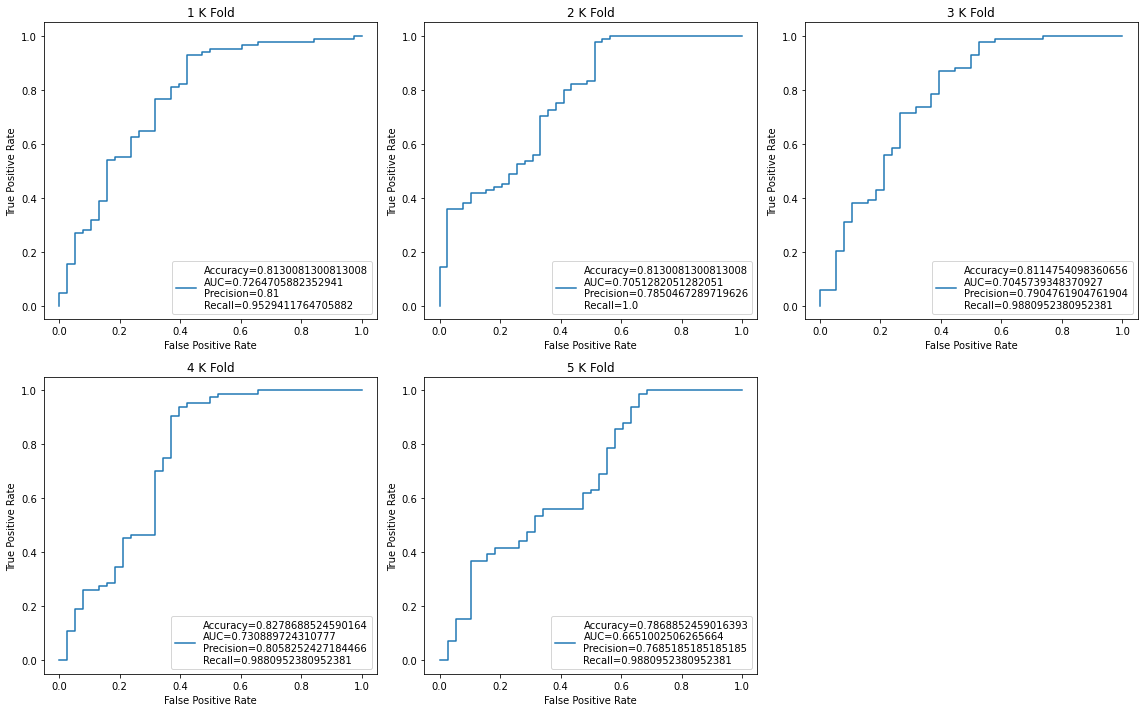%0A"
class="jp-needs-light-background" />

    Mean of accuracy = 0.8104491536718645
    Mean of auc score = 0.706432540627587
    Mean of precision = 0.7919733361370237
    Mean of recall = 0.9834453781512605

The results of logistic regression are same as before applying feature
scaling

**Based on various metrics evaluation, we can say that Random Forest is
performing the best**

In \[ \]:

In \[ \]:

In \[ \]:

In \[ \]:

In \[ \]:

In \[ \]: